# TASK-2 MOVIE RATING PREDICTION














In [24]:
# import libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math


1. Cleaning and inputed the data


In [9]:
df=pd.read_csv('IMDb Movies India.csv', encoding='latin1')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
df.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# DATA CLEANING

In [12]:
df.dropna(subset=df.columns[1:9],how='all',inplace=True)

In [14]:
df.dropna(subset=['Name','Year'],how='all',inplace=True)


In [13]:
df.drop_duplicates(['Name','Year'],keep='first',inplace=True)


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15477 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15477 non-null  object 
 1   Year      14958 non-null  object 
 2   Duration  7235 non-null   object 
 3   Genre     13614 non-null  object 
 4   Rating    7915 non-null   float64
 5   Votes     7916 non-null   object 
 6   Director  14962 non-null  object 
 7   Actor 1   13875 non-null  object 
 8   Actor 2   13110 non-null  object 
 9   Actor 3   12355 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [16]:
df.dropna(subset=['Year'],inplace=True)

In [17]:
df['Year']=df['Year'].str.extract(r'([0-9].{0,3})',expand=False)


In [18]:
df['Duration']=df['Duration'].str.extract(r'([0-9]+)',expand=False)


In [19]:
def get_mode_with_default(x):
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result[0]
    else:
        return 'unknown'

df['Actor 1']=df['Actor 1'].fillna(df.groupby('Year')['Actor 1'].transform(get_mode_with_default))
df['Actor 2']=df['Actor 2'].fillna(df.groupby('Year')['Actor 2'].transform(get_mode_with_default))
df['Actor 3']=df['Actor 3'].fillna(df.groupby('Year')['Actor 3'].transform(get_mode_with_default))

In [20]:
df['Director']=df.groupby(['Year','Actor 1','Actor 2','Actor 3'])['Director'].transform(get_mode_with_default)


In [21]:
df['Duration']=pd.to_numeric(df['Duration'])


In [26]:
def get_mean_with_default(x):
    mean_result = x.mean()
    if not math.isnan(mean_result):
            return round(mean_result)
    else:
        return 0
df['Duration']=df.groupby(['Year','Director','Actor 1','Actor 2','Actor 3'])['Duration'].transform(get_mean_with_default)

In [27]:
df['Director']=df.groupby(['Year','Actor 1','Actor 2','Actor 3'])['Director'].transform(get_mode_with_default)


In [29]:
df['Duration']=pd.to_numeric(df['Duration'])

In [30]:
def get_mean_with_default(x):
    mean_result = x.mean()
    if not math.isnan(mean_result):
            return round(mean_result)
    else:
        return 0
df['Duration']=df.groupby(['Year','Director','Actor 1','Actor 2','Actor 3'])['Duration'].transform(get_mean_with_default)

In [31]:
df['Rating']=df.groupby(['Director','Actor 1'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby(['Director','Actor 2'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby(['Director','Actor 3'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby(['Year','Director'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby('Year')['Rating'].transform(lambda x:x.mean())
df['Year']=pd.to_numeric(df['Year'])

In [32]:
df['Votes']=df['Votes'].str.extract(r'([0-9]+)',expand=False)
df['Votes']=pd.to_numeric(df['Votes'])

In [33]:
df['Votes']=df.groupby(['Year','Rating'])['Votes'].transform(lambda x:x.mean())


In [34]:
df['Votes']=df.groupby('Year')['Votes'].transform(lambda x:x.mean())


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14958 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14958 non-null  object 
 1   Year      14958 non-null  int64  
 2   Duration  14958 non-null  int64  
 3   Genre     13123 non-null  object 
 4   Rating    14947 non-null  float64
 5   Votes     14908 non-null  float64
 6   Director  14958 non-null  object 
 7   Actor 1   14958 non-null  object 
 8   Actor 2   14958 non-null  object 
 9   Actor 3   14958 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.3+ MB


# EDA

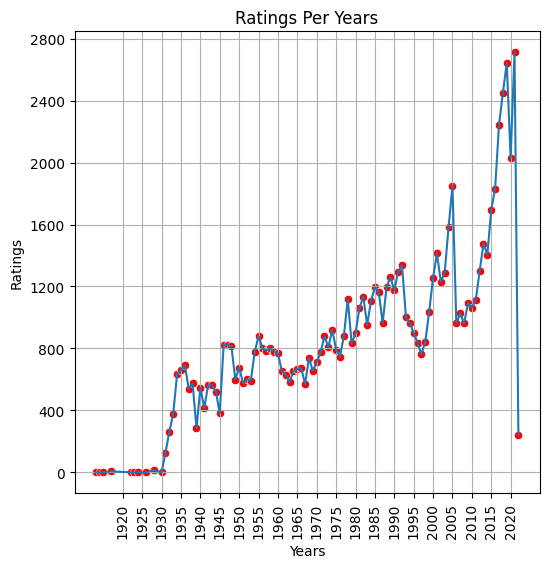

In [39]:
#Year with best rating
rating_sum=df.groupby('Year')['Rating'].sum().reset_index()

plt.figure(figsize=(6,6))
sns.lineplot(x='Year',y='Rating',data=rating_sum)
sns.scatterplot(x='Year',y='Rating',data=rating_sum,color='r')
plt.yticks(np.arange(0,3000,400))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Ratings')
plt.xlabel('Years')
plt.title('Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

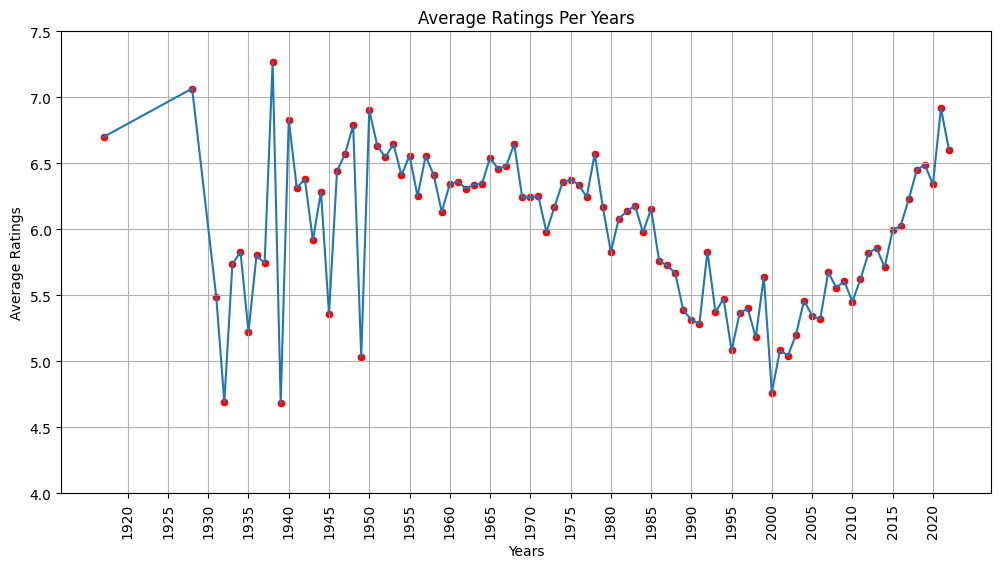

In [38]:
#Year with best average rating
rating_avg=df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_avg)
sns.scatterplot(x='Year',y='Rating',data=rating_avg,color='r')
plt.yticks(np.arange(4,8,0.5))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Ratings')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<ipython-input-45-bdd65db77f88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index,y=top_20.values, palette='viridis') # Remove data=df


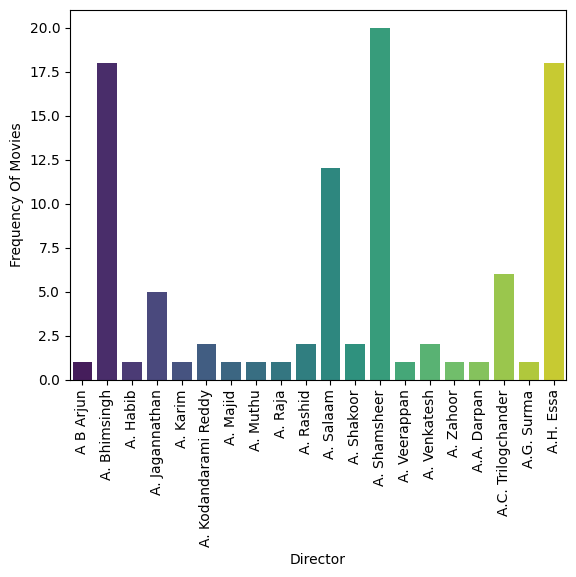

In [45]:
#Top 20 Directors by Frequency of Movies
top_20=df.groupby('Director')['Name'].count()[0:20]

sns.barplot(x=top_20.index,y=top_20.values, palette='viridis') # Remove data=df
plt.xticks(rotation=90)
plt.ylabel('Frequency Of Movies')
plt.xlabel('Director')
plt.show()

Correlation Of Duration And Rating is -0.07511162035794038


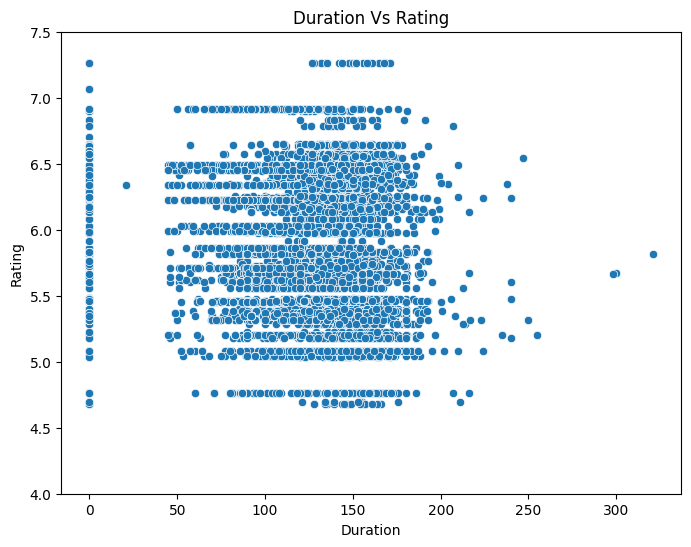

In [42]:
#Does length of movie have any impact with the rating
corr_leng_rat=df['Duration'].corr(df['Rating'])
print(f"Correlation Of Duration And Rating is {corr_leng_rat}")
#show there is no impact of duration on rating

plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration',y='Rating',data=df)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration Vs Rating')
plt.yticks(np.arange(4,8,0.5))
plt.show()

In [46]:
#Top 10 movies according to rating per year and overall.
overall=df.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 Movies Overall:")
overall

Top 10 Movies Overall:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Abhagin,1938,151,NaN,7.266085,9.555556,Prafulla Roy,Molina Devi,Prithviraj Kapoor,Vijay Kumar
1,Abhilasha,1938,134,NaN,7.266085,9.555556,Zia Sarhadi,Mahendra Thakore,M. Kumar,Bibbo
2,Adhikar,1938,132,NaN,7.266085,9.555556,P.C. Barua,P.C. Barua,Jamuna,Pahadi Sanyal
3,Baazigar,1938,152,NaN,7.266085,9.555556,Mohan Dayaram Bhavnani,K.L. Saigal,Ashok Kumar,Bibbo
4,Baghban,1938,159,Drama,7.266085,9.555556,Abdul Rashid Kardar,Bimla Kumari,B. Nandrekar,Sitara Devi
5,Bahadur Kisan,1938,0,NaN,7.266085,9.555556,Master Bhagwan,Chandrarao,Chandrarao,Hansa Wadkar
6,Ban Ki Chidiya,1938,0,Action,7.266085,9.555556,Jayant Desai,Madhuri,Eddie Billimoria,Ishwarlal
7,Banke Sanvaria,1938,0,NaN,7.266085,9.555556,Nanubhai Vakil,Navinchandra,Vatsala Kumthekar,Yasmin
8,Bhabi,1938,0,"Drama, Family",7.266085,9.555556,Franz Osten,Renuka Devi,Paidi Jairaj,Meera
9,Bhedi Trishul,1938,0,NaN,7.266085,9.555556,A.M. Khan,Ameena,Ansari,Kamia


In [56]:
#Number of popular movies released each year.
rat_bool=df['Rating']>=6
# Convert 'Votes' column to integers, handling missing values
# Remove commas and currency symbols from 'Votes' column before converting to integers
df['Votes'] = df['Votes'].str.replace(',', '').str.replace('$', '').str.replace('M', '').fillna(0).astype(float).astype(int)
vot_bool = df['Votes'] > 110
pop_df=df[vot_bool & rat_bool]
pop_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
15,102 Not Out,(2018),102 min,"Comedy, Drama",7.4,6619,Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz
18,10ml LOVE,(2010),87 min,"Comedy, Drama, Romance",6.3,162,Sharat Katariya,Neil Bhoopalam,Anusha Bose,Manu Rishi Chadha
28,13B: Fear Has a New Address,(2009),146 min,"Drama, Horror, Mystery",7.3,6329,Vikram K. Kumar,Madhavan,Neetu Chandra,Poonam Dhillon
...,...,...,...,...,...,...,...,...,...,...
15405,Zapatlela,(1993),168 min,"Comedy, Drama, Horror",7.6,582,Mahesh Kothare,Laxmikant Berde,Mahesh Kothare,Kishori Ambiye
15416,Zed Plus,(2014),141 min,Comedy,6.4,449,Chandra Prakash Dwivedi,Vinod Acharya,Rajeev Ankit,Adil Hussain
15476,Zindagi Na Milegi Dobara,(2011),155 min,"Comedy, Drama",8.2,70344,Zoya Akhtar,Hrithik Roshan,Farhan Akhtar,Abhay Deol
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana


In [57]:
df.dropna(inplace=True)
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

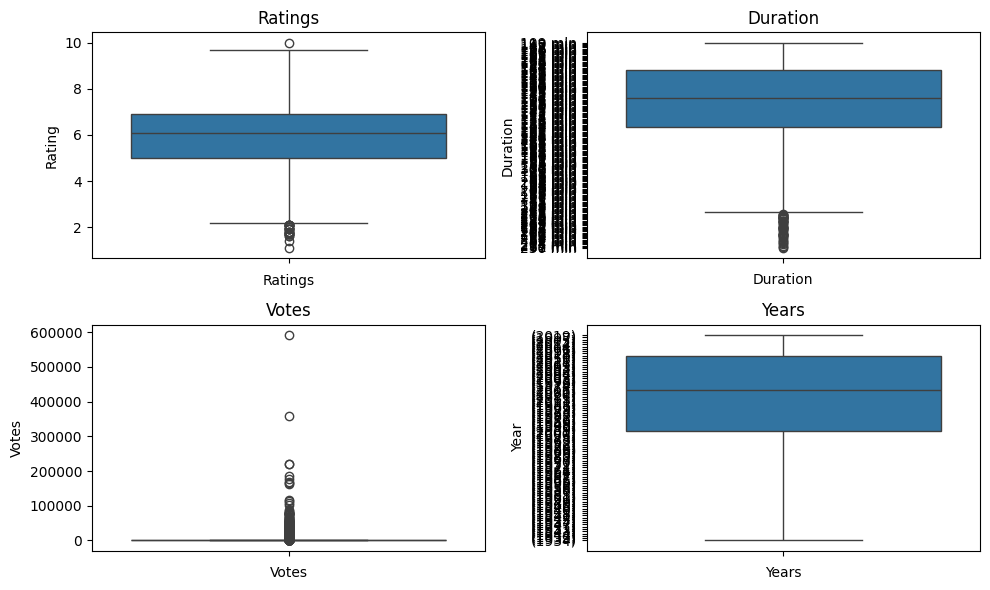

In [58]:
#df.reset_index()
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,6))

sns.boxplot(data=df,y='Rating',ax=ax[0][0])
ax[0][0].set_title('Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=df,y='Duration',ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df,y='Votes',ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=df,y='Year',ax=ax[1][1])
ax[1][1].set_title('Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

In [59]:
def out(df,col,dis):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-(iqr*dis)
    upper=q3+(iqr*dis)
    return lower,upper

In [60]:
votes_low,votes_up=out(df,'Votes',1.5)


In [61]:
vote_out_count=(df['Votes'] > votes_up) | (df['Votes'] < votes_low)



In [62]:
df['Votes'][vote_out_count].count()


918

In [63]:
df=df[(df['Votes']>votes_low) & (df['Votes']<votes_up)]


In [65]:
# Convert 'Year' column to numeric type
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

year_low, year_upper = out(df, 'Year', 1.5)

In [66]:
year_out_count=(df['Year']>year_upper) | (df['Year']<year_low)


In [67]:
df['Year'][year_out_count].count()


0

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

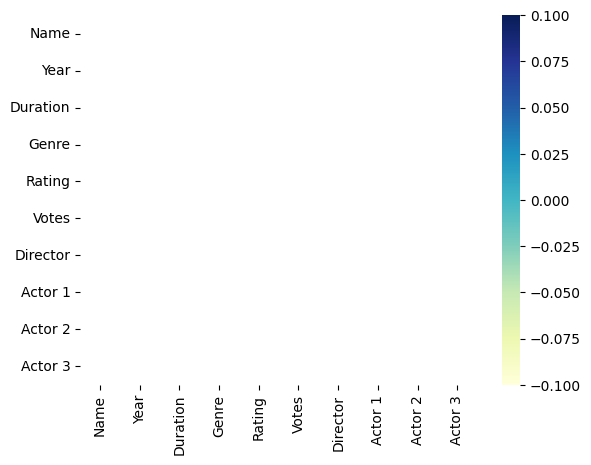

In [73]:
  sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)


In [74]:
df=df[(df['Year']>year_low) &(df['Year']<year_upper)]
df.shape


(0, 10)

# APPLYING **ML**



In [75]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
df['Name']=LB.fit_transform(df['Name'])
df['Genre']=LB.fit_transform(df['Genre'])
df['Director']=LB.fit_transform(df['Director'])
df['Actor 1']=LB.fit_transform(df['Actor 1'])
df['Actor 2']=LB.fit_transform(df['Actor 2'])
df['Actor 3']=LB.fit_transform(df['Actor 3'])

In [76]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [81]:
from sklearn.model_selection import train_test_split
x=df.drop('Rating',axis=1)
y=df['Rating']